In [151]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt
import numpy as np
import random


In [152]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [153]:
test= np.loadtxt('mnist_test.csv',delimiter=',' )
train=np.loadtxt('mnist_train.csv',delimiter=',' )

x_train = train[:, 1:] / 255.0
y_train = train[:, 0].astype(np.int64)  # chatgpt help

x_test = test[:, 1:] / 255.0
y_test = test[:, 0].astype(np.int64)


In [154]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)


(60000, 784)
(60000,)
(10000, 784)
(10000,)


random image

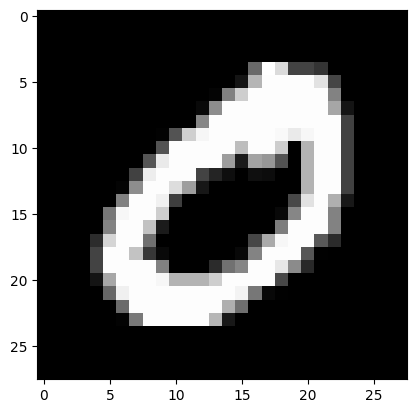

In [155]:
index = int(random.randrange(0,x_train.shape[1]))
plt.imshow(x_train[ index, : ].reshape((28,28,1)), cmap='gray')
plt.show()


In [169]:
xtrain = torch.tensor(x_train.reshape(-1, 1, 28, 28), dtype=torch.float32)
ytrain = torch.tensor(y_train)
xtest = torch.tensor(x_test.reshape(-1, 1, 28, 28), dtype=torch.float32)
ytest = torch.tensor(y_test)

In [170]:
train_dataset = TensorDataset(xtrain, ytrain)
test_dataset = TensorDataset(xtest, ytest)
batch_size=50

In [171]:
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

In [172]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 8, kernel_size=3)  # 8 is filter
        self.pool = nn.MaxPool2d(2, 2)
        self.relu=nn.ReLU()
        self.conv2 = nn.Conv2d(8, 16, kernel_size=3)
        self.fc1 = nn.Linear(16 * 5 * 5, 64)
        self.fc2 = nn.Linear(64, 10)

    def forward(self, x):
        x=self.conv1(x)
        x=self.relu(x)
        x=self.pool(x)
        x=self.conv2(x)
        x=self.relu(x)
        x=self.pool(x)
        x = x.view(-1, 16 * 5 * 5)
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x


In [173]:
no_epochs=100
lr=0.001

In [174]:
model=CNN().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr)

In [ ]:
for epoch in range(no_epochs):
    model.train()
    running_loss = 0.0

    # Iterate over batches
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs, labels)

        # Backward pass and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * inputs.size(0)

    # Calculate epoch loss
    epoch_loss = running_loss / len(train_loader.dataset)

    # Evaluate on test set
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total



    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{no_epochs}], '
              f'Loss: {epoch_loss:.4f}, '
              f'Test Accuracy: {accuracy:.2f}%')


Epoch [10/100], Loss: 0.0227, Test Accuracy: 98.87%
Epoch [20/100], Loss: 0.0078, Test Accuracy: 98.74%
Epoch [30/100], Loss: 0.0046, Test Accuracy: 98.79%
Epoch [40/100], Loss: 0.0053, Test Accuracy: 98.87%
Epoch [50/100], Loss: 0.0038, Test Accuracy: 98.91%
Epoch [60/100], Loss: 0.0030, Test Accuracy: 98.86%
Epoch [70/100], Loss: 0.0017, Test Accuracy: 98.82%
Epoch [80/100], Loss: 0.0015, Test Accuracy: 98.82%
Epoch [90/100], Loss: 0.0034, Test Accuracy: 98.88%
